the purpose of this code is to create heatmap of reoccurrences of each gene ID and Plasmid ID

In [684]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [685]:
Dataset = pd.read_excel('finalDataset.xlsx') # read the excel file 
Dataset

,Unnamed: 0,Sample ID,GenBank ID,BioSample ID,Long-read SRA ID,Gene_ID Workflow,Gene_Id Bactopia,Common Genes,Missing From Workflow (Gene),Missing From Bactopia,Plasmid_ID Bactopia,Plasmid_ID workFlow,common Plasmid IDs,Missing_Ids From Bactopia (Plasmid),Missing_IDs From Workflow (Plasmid)
0,0,2014AM-1331,"CP093126,CP093127,CP093128",SAMN05596322,SRR19768540,NaN,"aph(3'')-Ib,aph(6)-Id,tet(A)",NaN,",aph,3,Ib,tet,A,aph,6,Id,",NaN,NaN,NaN,NaN,NaN,NaN
1,1,2014AM-2067,"CP093122,CP093123,CP093124,CP093125",SAMN05596277,SRR19768539,"aph(3'')-Ib,aph(6)-Id,parC(T57S),tet(A)","aph(3'')-Ib,aph(6)-Id,tet(A)","aph(3)-Ib, tet(A), aph(6)-Id",NaN,"parC,T57S,",NaN,"ColE1,Col156",NaN,"Col156,ColE1,",NaN
2,2,2015AM-0414,"CP093120,CP093121",SAMN07268462,SRR19768530,"aph(3'')-Ib,aph(6)-Id,parC(T57S),tet(A)","tet(A),aph(6)-Id,aph(3'')-Ib","aph(3)-Ib, tet(A), aph(6)-Id",NaN,"parC,T57S,",Col156,Col156,Col156,NaN,NaN
3,3,2015AM-0511,"CP093140,CP093141,CP093142,CP093143,CP093144,C...",SAMN07415498,SRR19768529,"aph(3'')-Ib,aph(6)-Id,blaTEM-1C,parC(T57S),tet(A)","aph(3'')-Ib,aph(6)-Id,tet(A),blaTEM-1","aph(3)-Ib, tet(A), aph(6)-Id","blaTEM,1,","blaTEM,1C,parC,T57S,","Col156,Col440I,Col440II,ColpVC","Col440II,Col(pHAD28),Col156,ColE1,ColE1,ColpVC","ColpVC,Col156,Col440II","Col,pHAD28,ColE1,","Col440I,"
4,4,2016AM-0673,"CP093116,CP093117,CP093118,CP093119",SAMN13512702,SRR19768528,"aph(3'')-Ib,aph(6)-Id,parC(T57S),tet(A)","tet(A),aph(6)-Id,aph(3'')-Ib","aph(3)-Ib, tet(A), aph(6)-Id",NaN,"parC,T57S,",NaN,NaN,NaN,NaN,NaN
5,5,2016K-0377,"CP093076,CP093077,CP093078,CP093079,CP093080",SAMN05250424,SRR19768533,parC(T57S),NaN,NaN,NaN,"parC,T57S,","Col156,Col440I,ColpVC,IncX1","IncX1,Col156,Col(pHAD28),ColpVC","ColpVC,IncX1,Col156","Col,pHAD28,","Col440I,"
6,6,2017AM-0493,"CP093109,CP093110,CP093111",SAMN17129770,SRR19768526,parC(T57S),NaN,NaN,NaN,"parC,T57S,",ColRNAI,ColE1,NaN,"ColE1,","ColRNAI,"
7,7,2021K-0017,CP093072,SAMN17478013,SRR19768531,"aph(3'')-Ib,aph(6)-Id,parC(T57S),tet(A)","aph(3'')-Ib,aph(6)-Id,tet(A)","aph(3)-Ib, tet(A), aph(6)-Id",NaN,"parC,T57S,",NaN,NaN,NaN,NaN,NaN
8,8,PNUSAS002131,"CP093112,CP093113,CP093114,CP093115",SAMN04961841,SRR19768527,parC(T57S),NaN,NaN,NaN,"parC,T57S,","Col8282,IncI1,IncX1","IncI1-I(gamma),IncX1,Col8282","IncX1,Col8282","IncI1,I,gamma,","IncI1,"
9,9,PNUSAS018090,"CP093096,CP093097,CP093098,CP093099,CP093100,C...",SAMN07427456,SRR19768524,parC(T57S),NaN,NaN,NaN,"parC,T57S,","Col156,Col440I,ColpVC,IncX1","IncX1,Col(pHAD28),Col156,ColpVC","ColpVC,IncX1,Col156","Col,pHAD28,","Col440I,"


get the reoccurrances of each IDS throughout the datatframe in all columns

In [686]:
#write function that can get the reoccurance of all individual ID 
def count_occurrences(df, column):
    split_df = df[column].str.split(',', expand=True).stack().str.strip().reset_index(drop=True)
    counts = split_df.value_counts()
    return counts

In [687]:
# pass each column through the function to get the reoccurrences 
gene_workflow_counts = count_occurrences(Dataset, 'Gene_ID Workflow')
gene_bactopia_counts = count_occurrences(Dataset, 'Gene_Id Bactopia')
plasmid_workflow_counts = count_occurrences(Dataset, 'Plasmid_ID  workFlow')
plasmid_bactopia_counts = count_occurrences(Dataset, 'Plasmid_ID Bactopia')

In [688]:
print("Gene Workflow counts:")
print(gene_workflow_counts)

Gene Workflow counts:
parC(T57S)     25
tet(A)         17
aph(3'')-Ib    12
aph(6)-Id      12
mcr-1.1        11
gyrA(D87N)      9
mcr-1.26        5
ant(3'')-Ia     5
gyrA(D87Y)      5
floR            4
aph(3')-Ia      3
sul1            3
qacE            3
fosA3           3
dfrA14          3
blaCTX-M-65     3
aph(4)-Ia       3
aac(3)-IV       3
blaTEM-1C       2
blaCMY-2        2
aadA2           1
tet(B)          1
blaTEM-1B       1
aac(3)-IId      1
sul3            1
qacH            1
cmlA1           1
mph(A)          1
dtype: int64


In [689]:
print("Gene Bactopia counts:")
print(gene_bactopia_counts)

Gene Bactopia counts:
tet(A)         18
mcr-1.1        16
aph(6)-Id      13
aph(3'')-Ib    13
gyrA(D87N)      9
aadA1           5
gyrA(D87Y)      5
floR            4
blaCTX-M-65     3
aph(3')-Ia      3
dfrA14          3
aac(3)-IVa      3
aph(4)-Ia       3
blaTEM-1        3
fosA3           3
qacEdelta1      3
sul1            3
blaCMY-2        2
sul3            1
qacL            1
tet(B)          1
aac(3)-IId      1
aadA2           1
cmlA1           1
mph(A)          1
dtype: int64


In [690]:
print("Plasmid Workflow counts:")
print(plasmid_workflow_counts)

Plasmid Workflow counts:
IncX4              14
IncFII(S)          10
IncFIB(S)          10
ColE1               9
IncI1-I(gamma)      9
Col(pHAD28)         7
ColpVC              7
Col156              5
IncX1               5
IncFIB(pN55391)     3
Col440II            2
Col8282             2
Col440I             1
IncI2(delta)        1
IncFII(pCRY)        1
dtype: int64


In [691]:
print("Plasmid Bactopia counts")
print(plasmid_bactopia_counts)

Plasmid Bactopia counts
IncX4           14
IncFIB(S)       10
IncFII(S)       10
IncI1            9
ColpVC           7
Col440I          5
IncX1            5
Col156           4
ColRNAI          3
Col440II         2
Col8282          2
IncI2            1
IncFII(pCRY)     1
dtype: int64


create heatmap of all the reoccurrences of gene ID and Plasmid IDs from dataframe 

In [692]:
gene_counts_df = pd.DataFrame({'Workflow': gene_workflow_counts, 'Bactopia': gene_bactopia_counts}).fillna(0)
plasmid_counts_df = pd. DataFrame({'Workflow': plasmid_workflow_counts, 'Bactopia': plasmid_bactopia_counts}).fillna(0)

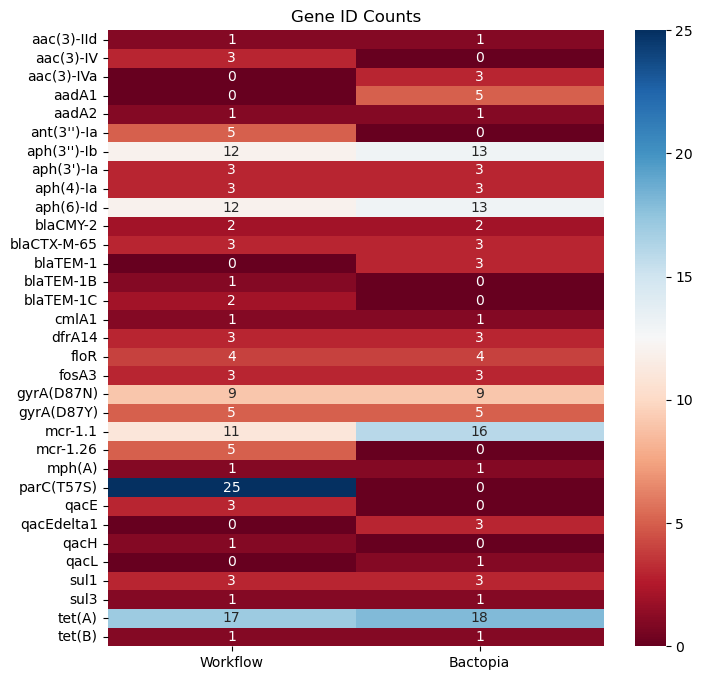

In [693]:
# create a heatmap of reoccurance of gene IDs
plt.figure(figsize=(8, 8))
sns.heatmap(gene_counts_df, annot=True, cmap='RdBu')
plt.title('Gene ID Counts')
plt.show()
    

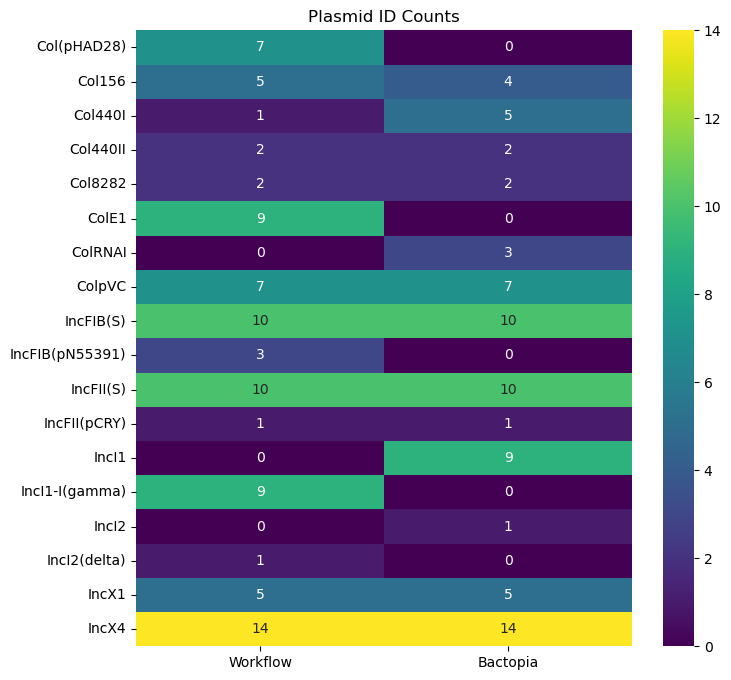

In [694]:
# create a heatmap of reoccurence of plasmid IDs
plt.figure(figsize=(8, 8))
sns.heatmap(plasmid_counts_df, annot=True, cmap='viridis')
plt.title('Plasmid ID Counts')
plt.show()